## Install and import necessary packages

In [28]:
!pip install gym
!apt-get install python-opengl -y
!apt install xvfb -y

!pip install gym[atari]

!pip install pyvirtualdisplay
!pip install piglet

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package python-opengl
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.7).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


To activate virtual display we need to run a script once for training an agent, as follows:

In [29]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [30]:
# This code creates a virtual display to draw game images on.
# If you are running locally, just ignore it
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
import gym
from gym import logger as gymlogger
from gym.wrappers.record_video import RecordVideo
gymlogger.set_level(40) # error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay

"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else:
    print("Could not find video")


def wrap_env(env):
  env = RecordVideo(env, './video')
  return env

# OpenAI Gym

OpenAI gym is a python library that wraps many classical decision problems including robot control, videogames and board games. We will use the environments it provides to test our algorithms on interesting decision problems.

Gym documentation: https://www.gymlibrary.dev/content/basic_usage/#


Refer to the docstrings of github code to understand the attributes of the environment.

https://github.com/openai/gym/blob/dcd185843a62953e27c2d54dc8c2d647d604b635/gym/envs/classic_control/mountain_car.py#L18C1-L18C20

## Environment object

- env.observation_space : state space, all possible states.
- env.action_space : all possible actions the agent can take.
- env.state : Current state the agent is in.

- env.reset() : reset environment to initial state, return first observation
- env.render(): show current state.
- env.step(action) : commit action a and return (new observation, reward, is done, info)

## MountainCar

observation space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
action space: Discrete(3)
initial observation: [-0.52603173  0.        ]
action:  0

next observation: [-0.5270135  -0.00098175]
reward: -1.0
done: False
info: {}


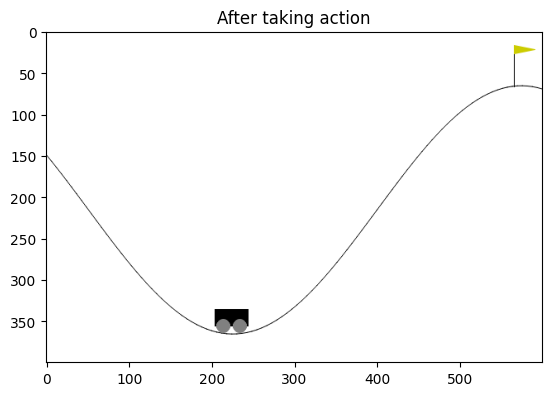

In [35]:
# env = gym.make('CartPole-v0')
env = gym.make('MountainCar-v0')

# env = wrap_env(env)

print('observation space:', env.observation_space)
print('action space:', env.action_space)

obs = env.reset()

print('initial observation:', obs)

action = env.action_space.sample()  # take a random action
print("action: ", action)

obs, r, done, info = env.step(action)
print('\nnext observation:', obs)
print('reward:', r)
print('done:', done)
print('info:', info)
plt.title("After taking action")
plt.imshow(env.render('rgb_array'))

### Random action

In [41]:
'''CartPole problem use random action'''
# env = gym.make('CartPole-v0')
env = gym.make('MountainCar-v0')
env = wrap_env(env)  # defined before for rendering online

observation = env.reset()

total_reward = 0

while True:
  env.render()

  # your agent goes here
  action = env.action_space.sample()   # take a random action
  observation, reward, done, info = env.step(action)
  # print(reward)
  total_reward+=reward

  if done:
    break;

env.close()
show_video()
print(total_reward)

-200.0


### Intutive action
- Accelerate to the left when car is on the left.
- Accelerate to the right when the car is on the right.

In [22]:
env = gym.make('MountainCar-v0')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
def policy(env):
  if env.state[1]>0:
    action = 2
  else:
    action = 1
  return action

In [42]:
env = gym.make('MountainCar-v0')
env = wrap_env(env)  # defined before for rendering online

observation = env.reset()

while True:
  # env.render()

  # your agent goes here
  action = policy(env)   # take a random action
  observation, reward, done, info = env.step(action)
  # print(reward)

  if done:
    break;

env.close()
show_video()

## Frozen Lake

In [25]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)
print("State space: ", env.observation_space)
print("Action space: ", env.action_space)
env.reset()
print("Current state: ",env.s)

State space:  Discrete(16)
Action space:  Discrete(4)
Current state:  0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Random action

In [26]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)
env = wrap_env(env)  # defined before for rendering online

observation = env.reset()

while True:
  # your agent goes here
  action = env.action_space.sample()  # take a random action
  print(action)
  observation, reward, done, info = env.step(action)
  # print(reward)

  if done:
    break;

env.close()
show_video()

2
0
3


📔 Select a [gym environment](https://www.gymlibrary.dev/index.html) and understand the evironment's states, actions and rewards by going through the Openai Gym's [documentation](https://www.gymlibrary.dev/content/basic_usage/#) and [github codes](https://github.com/openai/gym/tree/master/gym/envs).
- Explain in your own words what the env is about and what needs to be achieved. Give a one liner explaining what the observation space and action space is for the selected environment.
- Import the environment and make the agent take "random actions". Print the total reward the agent received at the end of an episode.
- Calculate the average total reward by simulating multiple episodes. (atleast 1000)
- Try modifying the actions to maximise the total reward. If the chosen environment is complex to hardcode the actions, you can just explain in your own words.